#Defining the question

a) Specifying the Data Analysis Question

Develop a model that predicts whether a patient will be diagnosed with diabetes

b) Defining the Metric for Success

We will have met the requirement if we can develop a model that predicts whether a person will be diagnosed with diabetes with an accuracy score greater than 85%

c) Understanding the context

As a data professional working for a pharmaceutical company, you need to develop a
model that predicts whether a patient will be diagnosed with diabetes. The model needs
to have an accuracy score greater than 0.85.

d) Recording the Experimental Design


1.   Data Importation
2.   Data Exploration
3.   Data Cleaning
4.   Data Preparation
5.   Data Modeling (Using Decision Trees, Random Forest and Logistic Regression)
6.   Model Evaluation
7.   Hyparameter Tuning
8.   Findings and Recommendations



e) Data Relevance

The data was relevant to our analysis

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt




# Data Importation

In [2]:
# Load and preview dataset
diabetes_df = pd.read_csv("https://bit.ly/DiabetesDS")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Exploration

In [3]:
#checking the data size
diabetes_df.shape

(768, 9)

The data has 768 rows and 9 columns

In [4]:
#cheking the first 5 records
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#checking the last 5 records
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
#checking for duplicated values
diabetes_df.duplicated().sum()

0

There are no duplicates in the dataset

In [7]:
# Checking for missing values
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values in the dataset

In [8]:
#checking the data types
#diabetes_df.head()
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

From the preview of the data,the data types are okay 

In [9]:
#checking the statistical measures of the data
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There are columns with minimum values of zero. These are Pregnancies, Glucose, BloodPressure, Skinthickness, Insulin,BMI.
While Zero pregnancies is okay, it is practically impossible to have a minimum of zero in the other parameters. We will treat these as missing values.

# Data Cleaning

In [10]:
#replacing zero values with NaN
diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [11]:
#checking the missing values 
diabetes_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

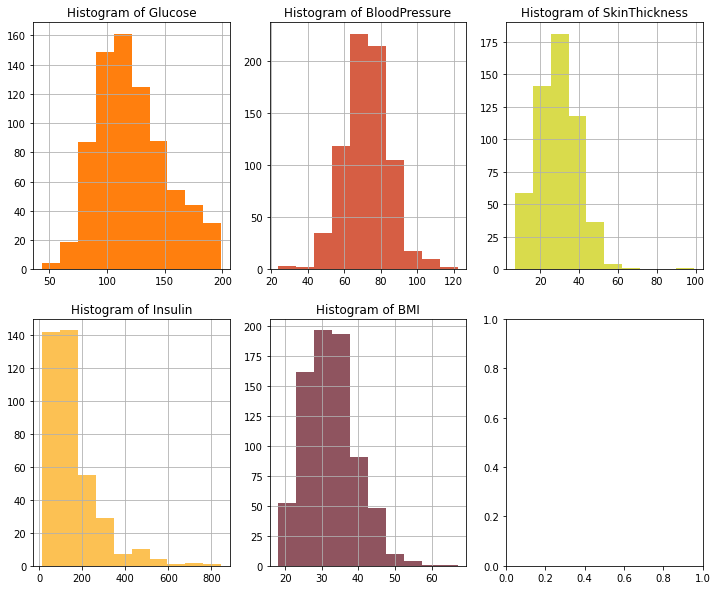

In [12]:
#To decide how to deal with the missing values we will plot histograms to check the distribution of the data
# if symmetric replace missing values with the mean
# if skewed replace missing values with mean or mode

#Plotting histograms
#Glucose,BloodPressure,SkinThickness,Insulin,BMI
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 10))

plt.subplot(2, 3, 1)
diabetes_df.Glucose.hist(color = '#ff7f0e')
plt.title('Histogram of Glucose')

plt.subplot(2, 3, 2)
diabetes_df.BloodPressure.hist(color = '#d65e44')
plt.title('Histogram of BloodPressure')

plt.subplot(2, 3, 3)
diabetes_df.SkinThickness.hist(color = '#d9db4c')
plt.title('Histogram of SkinThickness')

plt.subplot(2, 3, 4)
diabetes_df.Insulin.hist(color = '#fcc153')
plt.title('Histogram of Insulin')

plt.subplot(2, 3, 5)
diabetes_df.BMI.hist(color = '#8f545f')
plt.title('Histogram of BMI')


plt.show()

Glucose and blood pressure are symmetrical while skin thickness, insulin and BMI are skewed to the right.
We will therefore replace NaNs in Glucose and blood pressure with the mean and skin thickness, insulin and BMI with the median.

In [13]:
#replacing missing values 

diabetes_df[['Glucose','BloodPressure']]=diabetes_df[['Glucose','BloodPressure']].fillna((diabetes_df[['Glucose','BloodPressure']].mean()))
diabetes_df[['SkinThickness','Insulin','BMI']] = diabetes_df[['SkinThickness','Insulin','BMI']].fillna((diabetes_df[['SkinThickness','Insulin','BMI']].median()))


In [14]:
#checking for missing values
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Preparation

In [15]:
#importing model
from sklearn.model_selection import train_test_split

In [16]:
#Spliting data in to two sets

diabetes_train, diabetes_valid = train_test_split(diabetes_df, test_size=0.25, random_state=12345)

features_train=diabetes_train.drop(['Outcome'],axis=1)

features_valid = diabetes_valid.drop(['Outcome'],axis=1)

target_train = diabetes_train['Outcome']

target_valid= diabetes_valid['Outcome']

print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)

(576, 8)
(576,)
(192, 8)
(192,)


# Data Modelling

# Decision Tree Classifier

In [17]:
#importing model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

diabetes_train, diabetes_test = train_test_split(diabetes_df, test_size=0.25, random_state=12345)

features_train=diabetes_train.drop(['Outcome'],axis=1)  #X

features_test = diabetes_valid.drop(['Outcome'],axis=1) #y

target_train = diabetes_train['Outcome']

target_test= diabetes_valid['Outcome']

print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)


# creating the model
model = DecisionTreeClassifier(random_state=12345)

#Training the model
model.fit(features_train, target_train)

#prediction
predictions_test = model.predict(features_test)

#accuracy
accuracy_test = accuracy_score(target_test, predictions_test)

print('Accuracy score of test dt: ', accuracy_test)



(576, 8)
(576,)
(192, 8)
(192,)
Accuracy score of test dt:  0.7760416666666666


Decision Tree classifier accuracy score of 77% 

# Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier 

#diabetes_train, diabetes_valid = train_test_split(diabetes_df, test_size=0.25, random_state=12345)

 #storing the model in a variable
model_rf = RandomForestClassifier(random_state=12345, n_estimators=3)

#Training the model
model_rf.fit(features_train, target_train)

#Prediction
prediction_test_rf = model_rf.predict(features_test)

#accuracy
accuracy_test_rf = accuracy_score(target_test, prediction_test_rf)

print('Accuracy of test rf: ',accuracy_test_rf)



Accuracy of test rf:  0.75


# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression #importing the model

#storing the model in a variable
lr_model = LogisticRegression(random_state=12345, solver='liblinear') 

#training the model
lr_model.fit(features_train, target_train) 

#prediction
test_prediction_lr = lr_model.predict(features_test)

#accuracy
accuracy_test_lr = accuracy_score(target_test,test_prediction_lr )


print('Accuracy of test lr: ',accuracy_test_lr)

Accuracy of test lr:  0.796875


#Model Evaluation

Decision Tree Classifier








In [20]:
# creating the model
model = DecisionTreeClassifier(random_state=12345)

#Training the model
model.fit(features_train, target_train)

#prediction
predictions_test = model.predict(features_test)


#accuracy
accuracy_test = accuracy_score(target_test, predictions_test)


print('Accuracy score of test dt: ', accuracy_test)


Accuracy score of test dt:  0.7760416666666666


Random Forest Classifier

In [21]:
 #storing the model in a variable
model_rf = RandomForestClassifier(random_state=12345, n_estimators=3)

#Training the model
model_rf.fit(features_train, target_train)

#Prediction
prediction_test_rf = model_rf.predict(features_test)

#accuracy
accuracy_test_rf = accuracy_score(target_test, prediction_test_rf)

print('Accuracy of test rf: ',accuracy_test_rf)


Accuracy of test rf:  0.75


Logistic Regression

In [22]:
#storing the model in a variable
lr_model = LogisticRegression(random_state=12345, solver='liblinear') 

#training the model
lr_model.fit(features_train, target_train) 

#prediction
test_prediction_lr = lr_model.predict(features_test)
train_prediction_lr = lr_model.predict(features_train)

#accuracy
accuracy_test_lr = accuracy_score(target_test,test_prediction_lr)
accuracy_train_lr = accuracy_score(target_train,train_prediction_lr)

print('Accuracy of test lr: ',accuracy_test_lr)
print('Accuracy of train lr: ',accuracy_train_lr)

Accuracy of test lr:  0.796875
Accuracy of train lr:  0.7604166666666666


#Tuning Hyperparameters

Decision Tree Classifier

In [23]:
for depth in range(1, 15):
        model = DecisionTreeClassifier(random_state=12345,max_depth=depth)# < create a model, specify max_depth=depth >
        
        model.fit(features_train, target_train)

        predictions_test = model.predict(features_test)

        accuracy_score(target_test, predictions_test)

        # predictions_valid = # < find the predictions using validation set >

        print("max_depth =", depth, ": ", end='')
        print(accuracy_score(target_test, predictions_test))

max_depth = 1 : 0.7708333333333334
max_depth = 2 : 0.7708333333333334
max_depth = 3 : 0.765625
max_depth = 4 : 0.7395833333333334
max_depth = 5 : 0.7708333333333334
max_depth = 6 : 0.765625
max_depth = 7 : 0.7083333333333334
max_depth = 8 : 0.7135416666666666
max_depth = 9 : 0.75
max_depth = 10 : 0.7447916666666666
max_depth = 11 : 0.7708333333333334
max_depth = 12 : 0.75
max_depth = 13 : 0.7760416666666666
max_depth = 14 : 0.7552083333333334


Choosing the lowest depth with the highest score, we will work with max_depth of 13 with accuracy score of 77.6%

In [24]:
# creating the model with max_depth 13
model = DecisionTreeClassifier(random_state=12345,max_depth=13)

#Training the model
model.fit(features_train, target_train)

#prediction
predictions_test = model.predict(features_test)

#accuracy
accuracy_test = accuracy_score(target_test, predictions_test)

print('Accuracy score of test dt: ', accuracy_test)

Accuracy score of test dt:  0.7760416666666666


Random Forest Classifier

In [25]:
#assuming a max_depth of 13 we tune our random forest

for estimator in range(1,15):
        model_rf = RandomForestClassifier(random_state=12345, max_depth=13, n_estimators=estimator)
        
        model_rf.fit(features_train, target_train)

        prediction_test_rf = model_rf.predict(features_test)
        #score(test_features, target)
        #predictions = model.predict(test_features)
        accuracy_test_rf = accuracy_score(target_test, prediction_test_rf)
       
        print("estimator =", estimator, ": ", end='')
        print(accuracy_score(target_test, prediction_test_rf))

estimator = 1 : 0.7447916666666666
estimator = 2 : 0.7604166666666666
estimator = 3 : 0.7708333333333334
estimator = 4 : 0.7708333333333334
estimator = 5 : 0.8020833333333334
estimator = 6 : 0.7864583333333334
estimator = 7 : 0.7864583333333334
estimator = 8 : 0.78125
estimator = 9 : 0.8229166666666666
estimator = 10 : 0.796875
estimator = 11 : 0.7916666666666666
estimator = 12 : 0.796875
estimator = 13 : 0.7864583333333334
estimator = 14 : 0.78125


Estimator 9 has the highest accuracy score of 82.29%

In [27]:
 #storing the model in a variable
model_rf = RandomForestClassifier(random_state=12345, max_depth=13, n_estimators=9)

#Training the model
model_rf.fit(features_train, target_train)

#Prediction
prediction_test_rf = model_rf.predict(features_test)

#accuracy
accuracy_test_rf = accuracy_score(target_test, prediction_test_rf)

print('Accuracy of test rf: ',accuracy_test_rf)

Accuracy of test rf:  0.8229166666666666


In [41]:
#tuning min_sample_leaf
for min_samples_leaf in range(1,15):
        model_rf = RandomForestClassifier(random_state=12345, max_depth=13, n_estimators=9, min_samples_leaf=min_samples_leaf)
        
        model_rf.fit(features_train, target_train)

        prediction_test_rf = model_rf.predict(features_test)
        #score(test_features, target)
        #predictions = model.predict(test_features)
        accuracy_test_rf = accuracy_score(target_test, prediction_test_rf)
       
        print("max_leaf_nodes =", min_samples_leaf, ": ", end='')
        print(accuracy_score(target_test, prediction_test_rf))

max_leaf_nodes = 1 : 0.8229166666666666
max_leaf_nodes = 2 : 0.7916666666666666
max_leaf_nodes = 3 : 0.796875
max_leaf_nodes = 4 : 0.8177083333333334
max_leaf_nodes = 5 : 0.7760416666666666
max_leaf_nodes = 6 : 0.8125
max_leaf_nodes = 7 : 0.7864583333333334
max_leaf_nodes = 8 : 0.8333333333333334
max_leaf_nodes = 9 : 0.8125
max_leaf_nodes = 10 : 0.796875
max_leaf_nodes = 11 : 0.8020833333333334
max_leaf_nodes = 12 : 0.8177083333333334
max_leaf_nodes = 13 : 0.828125
max_leaf_nodes = 14 : 0.8125


In [45]:
 #storing the model in a variable
model_rf = RandomForestClassifier(random_state=12345, max_depth=13, n_estimators=9,min_samples_leaf=8)

#Training the model
model_rf.fit(features_train, target_train)

#Prediction
prediction_test_rf = model_rf.predict(features_test)

#accuracy
accuracy_test_rf = accuracy_score(target_test, prediction_test_rf)

print('Accuracy of test rf: ',accuracy_test_rf)

Accuracy of test rf:  0.8333333333333334


Logistic Regression

In [33]:
C_parameter_range = [0.001,0.01,0.1,1,10,100]

for i in C_parameter_range:
    
    # Apply logistic regression model to training data
    #lr = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    lr_model = LogisticRegression(random_state=12345, solver='liblinear',C=i) 

    #lr.fit(X_train_sepal_std,y_train_sepal)
    lr_model.fit(features_train, target_train)

    # Predict using model
    test_prediction_lr = lr_model.predict(features_test)
    
    # Saving accuracy score in table
    # table.iloc[c,1] = accuracy_score(target_test,test_prediction_lr)
    # c += 1

    accuracy_test_lr = accuracy_score(target_test,test_prediction_lr )


    print("C =",i,": ", end='')
    print(accuracy_score(target_test,test_prediction_lr))

C = 0.001 : 0.7291666666666666
C = 0.01 : 0.734375
C = 0.1 : 0.7552083333333334
C = 1 : 0.796875
C = 10 : 0.796875
C = 100 : 0.8072916666666666


C=100 gives the highest accuracy score but since parameter C is used for regularization smaller values of C increase regularization strength of the model. We will therefore stick to the default of 1 with accuracy of 79.68% to avoid over or underfitting

In [53]:
lr_model = LogisticRegression(random_state=12345, solver='liblinear') 

#training the model
lr_model.fit(features_train, target_train) 

#prediction
test_prediction_lr = lr_model.predict(features_test)

#accuracy
accuracy_test_lr = accuracy_score(target_test,test_prediction_lr )


print('Accuracy of test lr: ',accuracy_test_lr)

Accuracy of test lr:  0.796875


#Sanity Check

In [52]:
#Decision Tree Classifier
series_predicted_DT = pd.Series(predictions_test)
predicted_frequency_DT = series_predicted_DT.value_counts(normalize=True)
predicted_frequency_DT

0    0.661458
1    0.338542
dtype: float64

In [51]:
#Random Forest Classifier
series_predicted = pd.Series(prediction_test_rf)
predicted_frequency = series_predicted.value_counts(normalize=True)
predicted_frequency

0    0.75
1    0.25
dtype: float64

In [54]:
#Logistic Regression
series_predicted_LR = pd.Series(test_prediction_lr)
predicted_frequency_LR = series_predicted_LR.value_counts(normalize=True)
predicted_frequency_LR

0    0.807292
1    0.192708
dtype: float64

# Findings and Recommendations

Random forest classifier has the highest accuracy of 83.33% compared to Decision tree and logistic regression
Random Forest predicts 25% will be promoted compared to 33% of decision tree and 19% of Logistic regression
i'd recommend the Random forest as it has a relatively higher accuracy score 